In [ ]:
# Import PyTorch libraries
import torch
from torch import nn
import torch.nn.functional as F

# Import visualization library
import matplotlib.pyplot as plt


torch.__version__

'2.1.0+cu118'

In [ ]:
# Check to see if we have a GPU to use for training
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('A {} device was detected.'.format(device))


if device=='cuda':
    print (torch.cuda.get_device_name(device=device))

A cpu device was detected.


In [ ]:
# Use Pandas to do our dataprocessing on the dataset
import pandas as pd
url = 'https://raw.githubusercontent.com/abpZ3R0/LOAN-DATA/main/DATA%20BASE%201k.csv'
df = pd.read_csv(url)


df.head(10)

,Schm Desc,Rate,Sanct Lim,Balance,Status
0,1,9.0,1500000,982892.11,1
1,2,9.0,11000000,10795157.66,1
2,2,9.0,2490000,2285793.80,1
3,2,9.0,2500000,1573117.89,1
4,2,9.0,2500000,2327153.93,1
5,2,9.0,2500000,1645400.44,1
6,2,9.0,5000000,4415732.17,1
7,2,9.0,4300000,3179313.45,1
8,3,9.0,3300000,2692638.39,1
9,3,9.0,2600000,1899973.89,1


In [ ]:
# Check the size/shape of our dataset
df.shape

(999, 5)

In [ ]:

StatusMean = df['Status'].mean()
StatusStd = df['Status'].std()
df['Status'] = (df['Status']-StatusMean)/StatusStd

SanctLimMean = df['Sanct Lim'].mean()
SanctLimStd = df['Sanct Lim'].std()
df['Sanct Lim'] = (df['Sanct Lim']-SanctLimMean)/SanctLimStd

SchmDescMean = df['Schm Desc'].mean()
SchmDescStd = df['Schm Desc'].std()
df['Schm Desc'] = (df['Schm Desc']-SchmDescMean)/SchmDescStd

RateMean = df['Rate'].mean()
RateStd = df['Rate'].std()
df['Rate'] = (df['Rate']-RateMean)/RateStd

BalanceMean = df['Balance'].mean()
BalanceStd = df['Balance'].std()
df['Balance'] = (df['Balance']-BalanceMean)/BalanceStd

In [ ]:
df.head(10)

,Schm Desc,Rate,Sanct Lim,Balance,Status
0,-1.269965,0.079336,0.427923,0.356600,-0.281213
1,-0.972499,0.079336,5.483897,6.747238,-0.281213
2,-0.972499,0.079336,0.954809,1.205168,-0.281213
3,-0.972499,0.079336,0.960131,0.741008,-0.281213
4,-0.972499,0.079336,0.960131,1.232105,-0.281213
5,-0.972499,0.079336,0.960131,0.788085,-0.281213
6,-0.972499,0.079336,2.290650,2.592377,-0.281213
7,-0.972499,0.079336,1.918105,1.787109,-0.281213
8,-0.675032,0.079336,1.385897,1.470142,-0.281213
9,-0.675032,0.079336,1.013352,0.953887,-0.281213


In [ ]:
# Extract the inputs and create a PyTorch tensor x (inputs)
inputs = ['Schm Desc',	'Rate',	'Sanct Lim',	'Balance']
x = torch.tensor(df[inputs].values, dtype=torch.float, device=device)

outputs = ['Status']
y = torch.tensor(df[outputs].values,dtype=torch.float, device=device)

In [ ]:
x[0:10]

tensor([[-1.2700,  0.0793,  0.4279,  0.3566],
        [-0.9725,  0.0793,  5.4839,  6.7472],
        [-0.9725,  0.0793,  0.9548,  1.2052],
        [-0.9725,  0.0793,  0.9601,  0.7410],
        [-0.9725,  0.0793,  0.9601,  1.2321],
        [-0.9725,  0.0793,  0.9601,  0.7881],
        [-0.9725,  0.0793,  2.2907,  2.5924],
        [-0.9725,  0.0793,  1.9181,  1.7871],
        [-0.6750,  0.0793,  1.3859,  1.4701],
        [-0.6750,  0.0793,  1.0134,  0.9539]])

In [ ]:
y[0:10]

tensor([[-0.2812],
        [-0.2812],
        [-0.2812],
        [-0.2812],
        [-0.2812],
        [-0.2812],
        [-0.2812],
        [-0.2812],
        [-0.2812],
        [-0.2812]])

In [ ]:
# Define your PyTorch neural network
# Number of Inputs: 4
# Number of Hidden Units: 100
# Number of Hidden Layers: 2
# Activation Function:  Relu
# Number of Ouputs: 1
model = nn.Sequential(
            nn.Linear(4,100),
            nn.ReLU(),
            nn.Linear(100,200),
            nn.ReLU(),
            nn.Linear(200,1),
        )

# Move it to either the CPU or GPU depending on what we have available
model.to(device)
print(model(x[333]))

tensor([0.1779], grad_fn=<ViewBackward0>)


In [ ]:
ypred = model(x[333])
print(ypred)

tensor([0.1779], grad_fn=<ViewBackward0>)


In [ ]:
from re import X
import torch.optim as optim

# Meausure our neural network by mean square error
criterion =  nn.MSELoss()


# Train our network with a simple SGD approach
optimizer = optim.Adam(model.parameters(), lr=0.0001)
#print (criterion(model.forward(x[0:10]), y[0:10]))
# Train our network a using the entire dataset 5 times
for epoch in range(100):
    totalLoss = 0

    for i in range(len(x)):

        # Single Forward Pass
        ypred = model.forward(x[i])
        # Measure how well the model predicted vs actual
        loss = criterion(ypred, y[i])
        #print ("Loss: ", loss)

        # Track how well the model predicted
        totalLoss+=loss.item()

        # Update the neural network
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print out our loss after each training iteration

    print ("Total Loss: ", totalLoss)

Total Loss:  40.71697781195198
Total Loss:  40.70343650373648
Total Loss:  39.831384074078166
Total Loss:  40.92745642445094
Total Loss:  37.85222664325661
Total Loss:  38.22378538232016
Total Loss:  40.71419661639055
Total Loss:  42.28961347159346
Total Loss:  35.94795834633181
Total Loss:  39.4361732516015
Total Loss:  39.514125208149245
Total Loss:  37.17111755378598
Total Loss:  44.92436030295854
Total Loss:  41.88515307192156
Total Loss:  36.939835410626344
Total Loss:  42.777044237489974
Total Loss:  37.851941283391994
Total Loss:  38.643628812343664
Total Loss:  42.794305860029475
Total Loss:  46.648284417333514
Total Loss:  41.26571041663686
Total Loss:  35.15405761855482
Total Loss:  35.8895108693672
Total Loss:  42.0724034898377
Total Loss:  38.21800670440721
Total Loss:  40.99328773432322
Total Loss:  44.347715292004246
Total Loss:  36.33128013383566
Total Loss:  39.389924674193274
Total Loss:  44.41756225685988
Total Loss:  38.63372420328854
Total Loss:  34.63636740508387
T

In [ ]:
# Plot predictions vs. true values
@torch.no_grad()
def graphPredictions(model, x, y , minValue, maxValue):

    model.eval()                               # Set the model to inference mode

    predictions=[]                             # Track predictions
    actual=[]                                  # Track the actual labels

    x.to(device)
    y.to(device)
    model.to(device)

    for i in range(len(x)):

        # Single forward pass
        pred = model(x[i])

        # Un-normalize our prediction
        pred = pred*StatusStd+StatusMean
        act = y[i]*StatusStd+StatusMean

        # Save prediction and actual label
        predictions.append(pred.tolist())
        actual.append(act.item())

    # Plot actuals vs predictions
    plt.scatter(actual, predictions)
    plt.xlabel('Actual Status')
    plt.ylabel('Predicted Status')
    plt.plot([minValue,maxValue], [minValue,maxValue])
    plt.xlim(minValue, maxValue)
    plt.ylim(minValue, maxValue)

    # Make the display equal in both dimensions
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

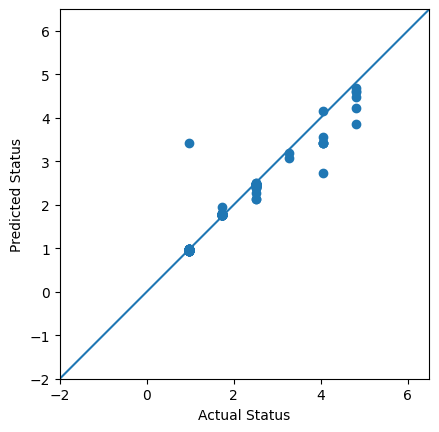

In [ ]:
graphPredictions(model, x, y, -2,6.5)

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/abpZ3R0/LOAN-DATA/main/DATA%20test%201k%20-%20Report%201.csv'
df = pd.read_csv(url)

df.head(10)
Y = df['Status']
SanctLimMean = df['Sanct Lim'].mean()
SanctLimStd = df['Sanct Lim'].std()

SchmDescMean = df['Schm Desc'].mean()
SchmDescStd = df['Schm Desc'].std()

RateMean = df['Rate'].mean()
RateStd = df['Rate'].std()

BalanceMean = df['Balance'].mean()
BalanceStd = df['Balance'].std()
StatusMean = df['Status'].mean()
StatusStd = df['Status'].std()
print(df.loc[[800]])

     Schm Desc  Rate  Sanct Lim  Balance  Status
800          6   0.0     990000      0.0       2


In [ ]:
# Data that affects the number of Schm Desc',	'Rate',	'Sanct Lim',	'Balance
Schm_Desc = 6
Rate = 0
Sanct_Lim = 990000
Balance = 0.0
actual = Y[800]



# Normalize our inputs using the same values for our training
Schm_Desc = (Schm_Desc-SchmDescMean)/ SchmDescStd
Rate = (Rate - RateMean)/ RateStd
Sanct_Lim = (Sanct_Lim- SanctLimMean) / SanctLimStd
Balance = (Balance - BalanceMean) / BalanceStd

# Create our input tensor
x1 = torch.tensor([Schm_Desc ,	Rate ,	Sanct_Lim,	Balance],dtype=float)

# Pass the input into the neural network
y1 = model(x1.float())

# Un-normalize our output y1
y1 = y1*StatusStd+StatusMean

# Compare what your network predicted to the actual
print ("Neural Network Predicts: ", y1.item())
print ("Actual Result: ", actual)




Neural Network Predicts:  3.6246891021728516
Actual Result:  2
